In [105]:
import numpy as np
import os

np.random.seed(42)

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [106]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [107]:
def random_digit():
    some_digit = X[36000]
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap = mpl.cm.binary,
            interpolation="nearest")
    plt.axis("off")
    plt.show()


In [108]:
def load_data():
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    return mnist

In [109]:
mnist = load_data()
X = mnist.data.to_numpy()
y = mnist.target.to_numpy()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=42)

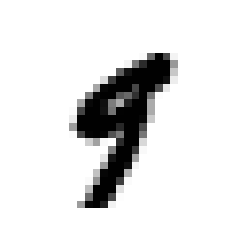

In [110]:
random_digit()

In [111]:
def create_new_y(dataset):
    new_y_data = []
    for i in dataset:
        if i==5:
            new_y_data.append(True)
        else:
            new_y_data.append(False)   
    return new_y_data
    
new_y_train = create_new_y(y_train)
new_y_test = create_new_y(y_test)

In [112]:
def SGDModel(x,y):
    clf = SGDClassifier(max_iter=1000, tol=1e-3)
    clf.fit(x, y)
    return clf
    
def getAccuracy(clf,x_test,y_test):
    pered = clf.predict(x_test)
    return accuracy_score(y_test,pered)
    
def KNNmodel(x,y):
    knn=KNeighborsClassifier(n_neighbors=3)
    knn.fit(x,y)
    return knn

In [113]:
clf = SGDModel(X_train, new_y_train)
SGDC_accuracy = getAccuracy(clf, X_test, new_y_test)
SGDC_accuracy

0.9684285714285714

### SGDClassifier Accuracy = 0.9671428571428572

In [114]:
knn = KNNmodel(X_train, new_y_train)
KNN_accuracy = getAccuracy(knn, X_test, new_y_test)
KNN_accuracy

0.9952857142857143

### KNN Accuracy = 0.9952857142857143

In [125]:
def crossVal():
    y_test_pred = cross_val_predict(knn, X_test, new_y_test, cv=3)
    return confusion_matrix(new_y_test,y_test_pred)

In [127]:
confusionMatrix = crossVal()
print(confusionMatrix)

[[6303   39]
 [  63  595]]


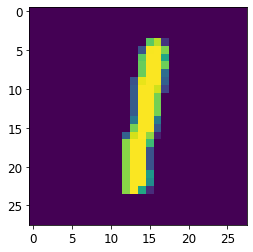

In [115]:
plt.imshow(X_test[1222].reshape(28,28))

In [116]:
y_test[1222]

1